# Particle Swarm Optimization

PSO ---> Metahuristic Algorithm (solve the problem with minimum data)

PSO ---> Evolutionary Algorithm 

PSO is from Swarm Intelligence (data sharing)

![Evolutionary Stages](pso2.jpg)

![Evolutionary Stages](pso.jpg)

![Evolutionary Stages](pso2.png)

In [1]:
import random
import matplotlib.pyplot as plt
import math
import copy

### Define the Cost Function

In [2]:
 
def f  (x):
    return sum(i**2 for i in x)

### Problem Definition

In [3]:

costFunction = f

x_dimension = 10

x_min = -5
x_max = 5

vel_max = (x_max - x_min) / 20
vel_min = -vel_max

### Optimizer hyperparameters (PSO)

In [4]:
iteration = 1000
swarm_size = 10

w = 0.729844  # inertia weight
c1 = 1.496180 # personal learning coefficient
c2 = 1.496180 # global learning coefficient

In [5]:
# constriction coefficient
phi1 = 2.05
phi2 = 2.05
phi = phi1 + phi2
chi = 2 / (phi-2 + math.sqrt(phi**2 - 4*phi))

w = chi
c1 = phi1 * chi
c2 = phi2 * chi

### Initilization
00:34:34 in AI 10-2


In [6]:
# 00:34:34 in AI 10-2

# empty class
class Particle:
    pass

agents = [Particle() for _ in range(swarm_size)]

for i in agents:
    # the i type is an object
    i.position = [random.uniform(x_min, x_max) for _ in range(x_dimension)]
    i.velocity = [0.01 * random.random() for _ in i.position]
    i.cost = costFunction(i.position)
    i.p_best = Particle()
    i.p_best.position = i.position[:]
    i.p_best.cost = copy.deepcopy(i.cost)

# global best
t = sorted(agents, key=lambda t: t.cost)[0].p_best
g_best = copy.deepcopy(t)

# empty vector to record the best solutions
best_costs = []

### PSO main loop

01:36:01 in AI 10-2

In [7]:
# 01:36:01 in AI 10-2

for it in range(iteration):
    for i in agents:
        for j in range(x_dimension):
            r1 = random.random()
            r2 = random.random()
            cognitive = c1*r1*(i.p_best.position[j] - i.position[j])     # c1 * r1 = cognitive # social = c2*r2 vector
            social = c2*r2*(g_best.position[j] - i.position[j])        
            
            i.velocity[j] = w*i.velocity[j] + cognitive + social
            
            # check the velocity's step
            i.velocity[j] = min(max(i.velocity[j], vel_min), vel_max)
            
            # update position
            i.position[j] += i.velocity[j]
            
            # 01:56

            # velocity mirroring
            test = (i.position[j] < x_min) or (i.position[j] > x_max)
            if test:
                i.velocity[j] = -i.velocity[j]
                i.position[j] = min(max(i.position[j],x_min), x_max)
        
        # update the agent's cost
        i.cost = costFunction(i.position)
        
        # update personal best
        if i.cost < i.p_best.cost:
            i.p_best.cost = copy.deepcopy(i.cost)
            i.p_best.position = copy.deepcopy(i.position)
    
    # update global best
    p_best_list = [i.p_best for i in agents]
    t = sorted(p_best_list, key=lambda t: t.cost)[0]
    g_best = copy.deepcopy(t)
    
    # record the best solution
    best_costs.append(g_best.cost)
    
    # print the results
    print ('Iteration {}: Best Solution = {}'.format(it, g_best.cost))

Iteration 0: Best Solution = 32.102745865925975
Iteration 1: Best Solution = 25.684379759240045
Iteration 2: Best Solution = 22.358294059355536
Iteration 3: Best Solution = 17.937066838489685
Iteration 4: Best Solution = 13.449540142418138
Iteration 5: Best Solution = 9.900316741134482
Iteration 6: Best Solution = 5.429225963299939
Iteration 7: Best Solution = 4.1783115684162535
Iteration 8: Best Solution = 2.754892007413307
Iteration 9: Best Solution = 1.8906860172918685
Iteration 10: Best Solution = 1.1498089636345672
Iteration 11: Best Solution = 1.10357075272793
Iteration 12: Best Solution = 1.10357075272793
Iteration 13: Best Solution = 1.0813855823838812
Iteration 14: Best Solution = 0.5841259068617595
Iteration 15: Best Solution = 0.5841259068617595
Iteration 16: Best Solution = 0.4950287167775891
Iteration 17: Best Solution = 0.4950287167775891
Iteration 18: Best Solution = 0.3295522670565646
Iteration 19: Best Solution = 0.15735649332021137
Iteration 20: Best Solution = 0.1573

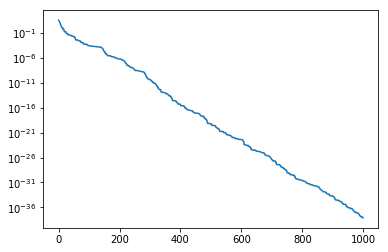

In [8]:
plt.semilogy(best_costs)
plt.show()

In [9]:
a = [1,2,3]
for i in range(3):
    a[i] = 3

In [10]:
a

[3, 3, 3]

In [11]:
a = [2,4,7,8]

for i in range(4):
    print (a[i])

for i in a:
    print (i)
    

2
4
7
8
2
4
7
8


In [12]:

a = 4
b = a
a = 5
b

4

In [13]:
a = b = 4
a = 5
b

4

In [14]:
a = [1,2,3]
b = a
a = [2,3,4]
b

[1, 2, 3]

In [15]:
a = [1,2,3]
b = a
a[0] = 4
b

[4, 2, 3]

In [16]:
import copy

class Particle:
    pass

a = Particle() 
a.att1 = [1,2,3]
a.att2 = [4,5,6]

In [17]:
b = a

In [18]:
b = Particle()
b.att1 = a.att1[:]
b.att2 = a.att2[:]

In [19]:
b = copy.deepcopy(a)

In [20]:
a.att1[1] = 20


In [21]:
b.att1

[1, 2, 3]

In [22]:
# Rastrigin function
from math import cos,pi
def f(x):
    return 10*len(x) + sum((i**2 - 10*cos(2*pi*i)) for i in x)

In [23]:
a = [0,0,-10,0,0,0,0,0,0,0,0]
f(a)

100.0